In [2]:
#Dealing with excel that have both numbers and strings

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
car_sales = pd.read_csv('C:\\Users\\Nana Qwasi\\Desktop\\Tutorials\\Programming\\100 Days of code\\Machine Learning\\Scikit\\Part 01\\Data\\car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [41]:
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [42]:
#Convert all strings into integers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
                                
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [43]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.20)

In [45]:
#RandomForestegressor is used when you want to predict the value
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
y_preds = model.predict(X_test)
y_preds

array([14911.28, 19621.05, 12124.15, 11964.99, 24161.2 , 16154.63,
        9070.08, 25387.98, 16122.9 , 20395.98, 19997.17, 18917.35,
       17327.45, 27776.87, 17257.72, 27222.66, 30900.86, 12350.49,
       19054.24,  9984.38,  8164.21, 18387.92, 35330.55, 13778.67,
       22359.22, 14746.11, 13278.34, 13245.7 , 12531.6 , 19586.25,
       23056.09, 20213.27, 11074.8 , 14479.09, 10006.12, 30466.31,
       13594.01, 12108.54,  9578.34, 15722.41, 10179.65,  9306.39,
       19977.85,  9552.06, 17300.42, 18958.81, 10344.42, 12580.09,
       30484.14, 12225.12, 10066.1 , 15645.08, 24454.57, 26037.5 ,
       19836.02, 17334.84, 17064.52, 10312.63, 18432.69,  9544.07,
       20852.78, 10512.13, 19070.66, 17455.85, 14096.09, 34699.14,
        9444.78, 14224.35, 11760.56, 17929.97, 10848.93,  9720.25,
       11431.75, 16421.62, 17188.74, 15404.42,  5846.5 , 22092.67,
        9585.19,  8035.64, 21687.93, 15800.19,  9294.9 , 10735.67,
       15045.64, 21333.83, 13960.24, 29551.55,  9936.03, 25366

In [47]:
y_test

735     6956
442    28354
484    16001
333     7252
327    31392
       ...  
720    50868
859     9450
411    41294
381     7378
679     9919
Name: Price, Length: 200, dtype: int64

In [48]:
model.score(X_train, y_train)

0.8975740672296681

In [49]:
model.score(X_test, y_test)

0.259996418764183

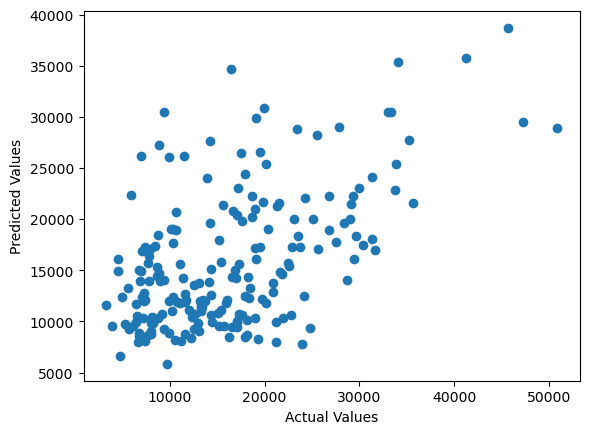

In [50]:
plt.scatter(y_test, y_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Erroor:", mean_absolute_error(y_test, y_preds))

Mean Absolute Erroor: 6011.473349999999


In [52]:
print("Mean Squared Erroor:", mean_squared_error(y_test, y_preds))

Mean Squared Erroor: 56521786.7495215


In [53]:
print("R-squared:", r2_score(y_test, y_preds))

R-squared: 0.259996418764183


In [54]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    model = RandomForestRegressor(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100: .2f}%")
    print(" ")

Trying model with 10 estimators...
Model accuracy on test set:  26.79%
 
Trying model with 20 estimators...
Model accuracy on test set:  23.67%
 
Trying model with 30 estimators...
Model accuracy on test set:  24.04%
 
Trying model with 40 estimators...
Model accuracy on test set:  27.49%
 
Trying model with 50 estimators...
Model accuracy on test set:  25.76%
 
Trying model with 60 estimators...
Model accuracy on test set:  23.87%
 
Trying model with 70 estimators...
Model accuracy on test set:  25.10%
 
Trying model with 80 estimators...
Model accuracy on test set:  24.77%
 
Trying model with 90 estimators...
Model accuracy on test set:  26.12%
 


In [55]:
import pickle

pickle.dump(model, open("random_forest_regressor_model.pkl", "wb"))

In [56]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.0